In [154]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [155]:
dataset_name = "climate_related_disasters"

In [156]:
input_fname = "Climate-related_Disasters_Frequency.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [157]:
data = pd.read_csv(input_fname)
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [158]:
data.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1980', 'F1981',
       'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989',
       'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997',
       'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022'],
      dtype='object')

# Prepare Data

In [159]:
# Retain the needed columns 
# Specify only the required columns: 'Country', 'Indicator', and the year columns from 1980 onwards.
columns_to_retain = ['Country', 'Indicator'] + [f'F{year}' for year in range(1980, 2023)]
data = data[columns_to_retain]

# Display the first few rows of the final dataframe to confirm the changes.
data.head()

,Country,Indicator,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


## Unpivot Years Columns

In [160]:
# Unpivoting the year columns to create a long format dataframe where each row represents a single year's data for a country.
data = pd.melt(data, id_vars=['Country', 'Indicator'], var_name='Year', value_name='Disasters')

# Displaying the first few rows of the unpivoted dataframe to confirm the changes.
data.head()


,Country,Indicator,Year,Disasters
0,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,NaN
1,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,NaN
2,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,1.0
3,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,NaN
4,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,NaN


## Fill NaNs with zeros

In [161]:
# Filling null values in the 'Disasters' column with zeros.
data = data.fillna({'Disasters': 0})

data.head()

,Country,Indicator,Year,Disasters
0,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,0.0
1,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,0.0
2,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,1.0
3,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,0.0
4,"Afghanistan, Islamic Rep. of","Climate related disasters frequency, Number of...",F1980,0.0


## Pivot Indicator columns

In [162]:
# Pivoting the 'Indicator' column to create a wide format where each unique indicator becomes a separate column.
data = data.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Disasters', fill_value=0)

# Resetting the index to flatten the dataframe and make it more readable.
data = data.reset_index()

# Displaying the first few rows of the pivoted dataframe to confirm the changes.
data.head()

Indicator,Country,Year,"Climate related disasters frequency, Number of Disasters: Drought","Climate related disasters frequency, Number of Disasters: Extreme temperature","Climate related disasters frequency, Number of Disasters: Flood","Climate related disasters frequency, Number of Disasters: Landslide","Climate related disasters frequency, Number of Disasters: Storm","Climate related disasters frequency, Number of Disasters: TOTAL","Climate related disasters frequency, Number of Disasters: Wildfire"
0,"Afghanistan, Islamic Rep. of",F1980,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Afghanistan, Islamic Rep. of",F1981,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",F1982,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Afghanistan, Islamic Rep. of",F1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Afghanistan, Islamic Rep. of",F1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Rename The Indicator Columns

In [163]:
# Renaming the indicator columns by keeping only the part after ": "
columns = [
       'Climate related disasters frequency, Number of Disasters: Drought',
       'Climate related disasters frequency, Number of Disasters: Extreme temperature',
       'Climate related disasters frequency, Number of Disasters: Flood',
       'Climate related disasters frequency, Number of Disasters: Landslide',
       'Climate related disasters frequency, Number of Disasters: Storm',
       'Climate related disasters frequency, Number of Disasters: TOTAL',
       'Climate related disasters frequency, Number of Disasters: Wildfire']

new_column_names = {col: col.split(': ')[-1] for col in columns}
data = data.rename(columns=new_column_names)
data.head()

Indicator,Country,Year,Drought,Extreme temperature,Flood,Landslide,Storm,TOTAL,Wildfire
0,"Afghanistan, Islamic Rep. of",F1980,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Afghanistan, Islamic Rep. of",F1981,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",F1982,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Afghanistan, Islamic Rep. of",F1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Afghanistan, Islamic Rep. of",F1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# Rename "TOTAL" column as "Total Disasters"
data.rename(
    columns={
        "TOTAL": "Total Disasters"
    },
    inplace=True
)
data.head()

Indicator,Country,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Total Disasters,Wildfire
0,"Afghanistan, Islamic Rep. of",F1980,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Afghanistan, Islamic Rep. of",F1981,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",F1982,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Afghanistan, Islamic Rep. of",F1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Afghanistan, Islamic Rep. of",F1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Format the Year Column

In [165]:
# Parsing the 'Year' column from 'F1980', 'F1981', etc. to '1980-01-01', '1981-01-01', etc. (yyyy-mm-dd format)
data['Year'] = data['Year'].str.replace('F', '').astype(int).astype(str) + '-01-01'

data['Year'] = pd.to_datetime(data['Year'])

# Displaying the first few rows of the dataframe to confirm the changes.
data.head()

Indicator,Country,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Total Disasters,Wildfire
0,"Afghanistan, Islamic Rep. of",1980-01-01,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Afghanistan, Islamic Rep. of",1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",1982-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Afghanistan, Islamic Rep. of",1983-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Afghanistan, Islamic Rep. of",1984-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
data['Year'].nunique()

43

# Pick Top 50 Largest Countries

In [167]:
filtered_country_list = [
    'Russian Federation',
    'Canada',
    'China, P.R.: Mainland',
    'United States',
    'Brazil',
    
    'Australia',
    'India',
    'Argentina',
    'Kazakhstan, Rep. of',
    'Algeria',
    
    'Congo, Dem. Rep. of the',
    'Saudi Arabia',
    'Mexico',
    'Indonesia',    
    'Sudan',
    
    'Libya',
    'Iran, Islamic Rep. of',
    'Mongolia',
    'Peru',
    'Chad',
    
    'Niger',
    'Angola',
    'Mali',
    'South Africa',
    'Colombia',
    
    'Ethiopia, The Federal Dem. Rep. of',
    'Bolivia',
    'Mauritania, Islamic Rep. of',
    'Egypt, Arab Rep. of',
    'Tanzania, United Rep. of',
    
    'Nigeria',
    'Venezuela, Rep. Bolivariana de',
    'Pakistan',
    'Namibia',
    'Mozambique, Rep. of',
    
    'Türkiye, Rep. of',
    'Chile',
    'Zambia',
    'Myanmar',
    'Afghanistan, Islamic Rep. of',
    
    'South Sudan, Rep. of',
    'France',
    'Somalia',
    'Central African Rep.',
    'Ukraine',
    
    'Madagascar, Rep. of',
    'Botswana',    
    'Kenya',
    'Yemen, Rep. of',
    'Thailand',
]
len(filtered_country_list)

50

In [168]:
# Filter the data to contain the given 50 countries
data = data[data['Country'].isin(filtered_country_list)]

# confirm we have 50 countries
found_list = data['Country'].unique()
len(found_list)

50

In [169]:
found_list

array(['Afghanistan, Islamic Rep. of', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Bolivia', 'Botswana', 'Brazil', 'Canada',
       'Central African Rep.', 'Chad', 'Chile', 'China, P.R.: Mainland',
       'Colombia', 'Congo, Dem. Rep. of the', 'Egypt, Arab Rep. of',
       'Ethiopia, The Federal Dem. Rep. of', 'France', 'India',
       'Indonesia', 'Iran, Islamic Rep. of', 'Kazakhstan, Rep. of',
       'Kenya', 'Libya', 'Madagascar, Rep. of', 'Mali',
       'Mauritania, Islamic Rep. of', 'Mexico', 'Mongolia',
       'Mozambique, Rep. of', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Peru', 'Russian Federation', 'Saudi Arabia',
       'Somalia', 'South Africa', 'South Sudan, Rep. of', 'Sudan',
       'Tanzania, United Rep. of', 'Thailand', 'Türkiye, Rep. of',
       'Ukraine', 'United States', 'Venezuela, Rep. Bolivariana de',
       'Yemen, Rep. of', 'Zambia'], dtype=object)

In [170]:
data.columns

Index(['Country', 'Year', 'Drought', 'Extreme temperature', 'Flood',
       'Landslide', 'Storm', 'Total Disasters', 'Wildfire'],
      dtype='object', name='Indicator')

In [171]:
series_col = "Country"
epoch_col = "Year"
epoch_label = "Year"
time_col = "Year"
value_col = "Total Disasters"
exog_cols = ['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm', 'Wildfire']

# Visualize Data

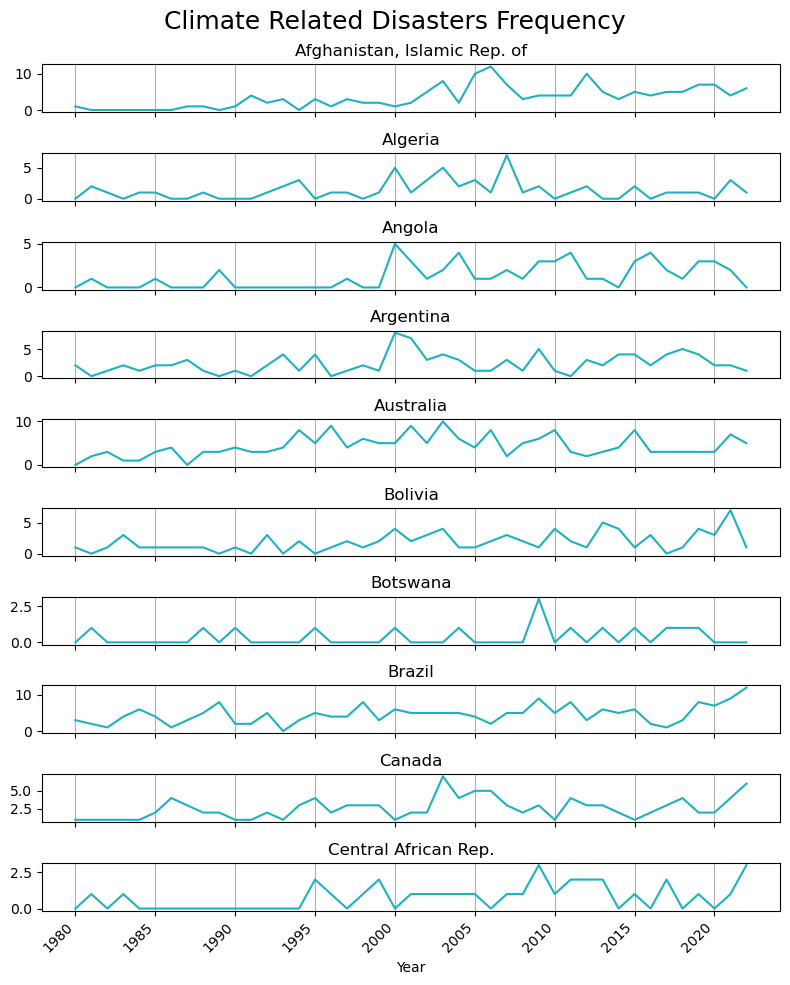

In [172]:
import matplotlib.pyplot as plt

def plot_trends(df, series_col, val_col, epoch_col, epoch_label, num_series=10,
                filepath=outp_fig_fname, chart_title=dataset_name):
    """
    This function takes a dataframe and a number of series to chart.
    It creates a n x 1 subplot (with n being the number of series, at most 10) and plots those series.
    
    Parameters:
    df (DataFrame): dataframe.
    num_series (int): The number of series to plot, defaulted to 10.
    """
    
    # Get the unique series from the dataframe
    unique_series = df[series_col].unique()
    
    # Limit the number of series to plot
    series_to_plot = unique_series[:min(len(unique_series), num_series)]
    
    # Set up the subplots
    fig, axes = plt.subplots(nrows=min(num_series, len(series_to_plot)), ncols=1, figsize=(8, num_series*1))
    
    # If there's only one series to plot, axes will not be an array, so we wrap it in a list
    if num_series == 1:
        axes = [axes]
    
    # Define the color for the plots
    plot_color = '#1db1c1'
    
    # Plot each series on a separate subplot
    for i, (ax, series_id) in enumerate(zip(axes, series_to_plot)):
        # Filter the dataframe for the current series
        series_data = df[df[series_col] == series_id]
                
        # Plot the data
        ax.plot(series_data[epoch_col], series_data[val_col], color=plot_color)
        
        # Set the title and labels
        ax.set_title(series_id)
        # ax.set_ylabel('Trend')
        # Show x-axis grid
        ax.xaxis.grid(True)
        
        # Show x-axis labels only for the last (bottom) plot
        if i < len(series_to_plot) - 1:
            ax.set_xticklabels([])
        else:
            # Rotate date labels to avoid overlap
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            ax.set_xlabel(epoch_label)            
        
        # Rotate date labels to avoid overlap
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(chart_title, fontsize=18)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save figure
    plt.savefig(filepath)
    
    plt.show()

# Plot a few series
plot_trends(
    data,
    series_col=series_col,
    val_col=value_col,
    epoch_col=epoch_col,
    epoch_label=epoch_label,
    num_series=10,
    filepath=outp_fig_fname,
    chart_title="Climate Related Disasters Frequency"
)  


# Save Main Data File

In [173]:
all_cols = [series_col, epoch_col, value_col] + exog_cols    
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False)

In [174]:
data[all_cols].head()

Indicator,Country,Year,Total Disasters,Drought,Extreme temperature,Flood,Landslide,Storm,Wildfire
0,"Afghanistan, Islamic Rep. of",1980-01-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,"Afghanistan, Islamic Rep. of",1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",1982-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Afghanistan, Islamic Rep. of",1983-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Afghanistan, Islamic Rep. of",1984-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
